### INTRODUCTION

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).The goal of the project is to do Exploratory data analyis and identify the necessary columns that would be helpful in building the model to predict the target variable.

### VARIABLES IN THE DATASET:

|variable name|Variable explanation                                    |
|-------------|--------------------|
|age|age of the customer(numeric)|
|job|type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')|
|marital| marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|
|education|(categorical:primary, secondary , teritary and unknown)|
|default:| has credit in default? (categorical: 'no','yes','unknown')|
|housing:|has housing loan? (categorical: 'no','yes','unknown')|
|loan:| has personal loan? (categorical: 'no','yes','unknown')|
|contact|contact communication type (categorical: 'cellular','telephone')|
|day|days in the month(numeric)|
|month| last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')|
|duration| last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model|
|campaign| number of contacts performed during this campaign and for this client (numeric, includes last contact)|
|pdays| number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)|
|previous| number of contacts performed before this campaign and for this client (numeric)|
|poutcome| outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')|
|y |has the client subscribed a term deposit? (binary: 'yes','no')|

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
train_data=pd.read_csv(r"C:\Users\dsv24\Downloads\datasets\train.csv",sep=';') # reading the train dataset with the help of pandas library.
train_data              

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
test_data=pd.read_csv(r"C:\Users\dsv24\Downloads\datasets\test.csv",delimiter=';') # reading the test dataset with the help of pandas library.
test_data         

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Inference: this data is 10% of data from train data set. so this data is not necessary to be added in the train dataset. For checking purpose i am keeping it. if it shows duplicated values i will remove it later.

In [5]:
Bank_marketing=pd.concat([train_data,test_data]) # concatenating the train dataset and test dataset to bank marketing.
Bank_marketing

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
Bank_marketing.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
Bank_marketing.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [8]:
Bank_marketing.info() # info function gives us an overall understanding of the data frame.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [9]:
Bank_marketing[['job','marital','education','default','housing','loan','contact','month','poutcome','y']]=Bank_marketing[['job','marital','education','default','housing','loan','contact','month','poutcome','y']].astype("category")
# converting datatype of an object to category.

In [124]:
Bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 4.2 MB


<AxesSubplot:>

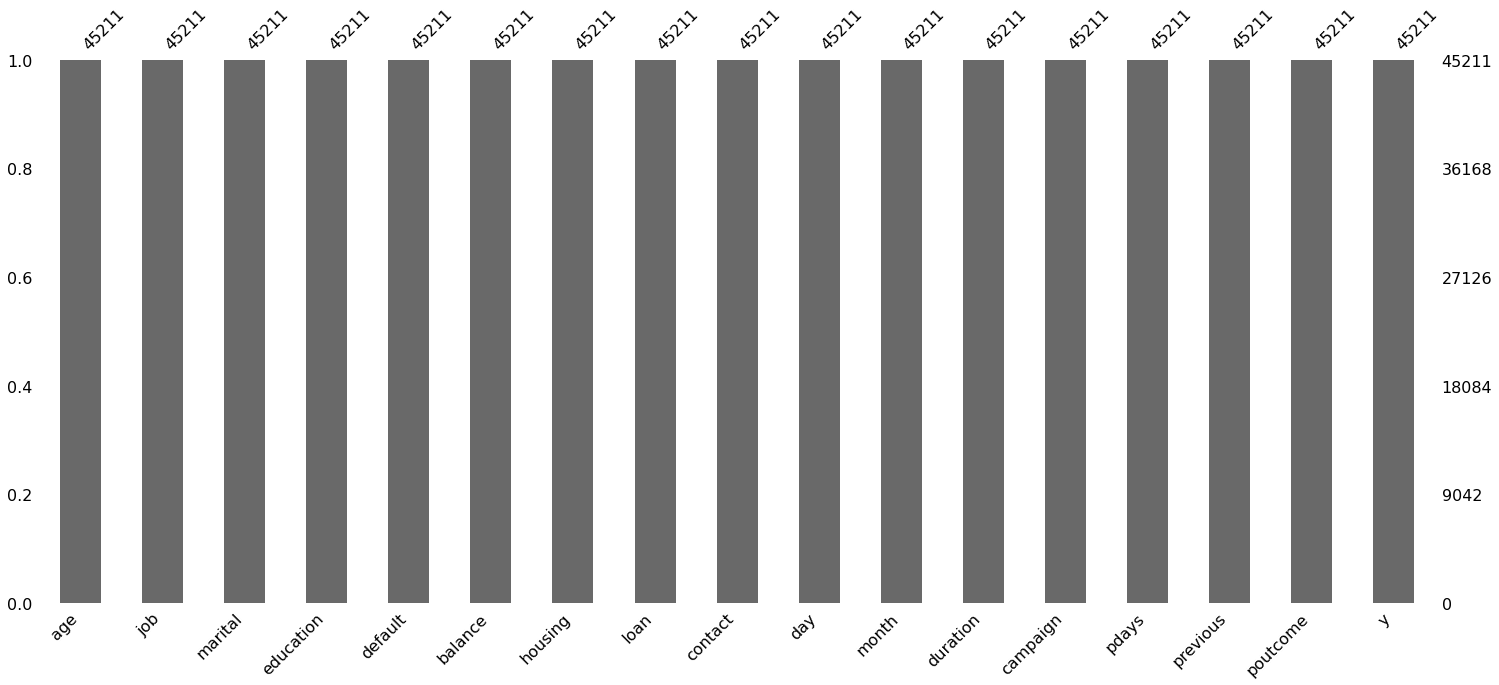

In [208]:
msno.bar(Bank_marketing) # used missing no library for showing the null values in the data through bar graph.

In [12]:
Bank_marketing.duplicated().sum() # duplicated function helps in identifying the no of dupicated values.

4521

In [13]:
Bank_marketing.drop_duplicates(inplace=True) # dropping the duplicataed values.

In [14]:
Bank_marketing.shape 

(45211, 17)

In [15]:
Bank_marketing.duplicated().sum() # checking the duplicated values

0

In [16]:
Bank_marketing.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [130]:
Bank_marketing["pdays"].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [135]:
Bank_marketing['pdays'].value_counts(normalize=True)*100

-1      81.736745
 182     0.369379
 92      0.325142
 91      0.278693
 183     0.278693
          ...    
 449     0.002212
 452     0.002212
 648     0.002212
 595     0.002212
 530     0.002212
Name: pdays, Length: 559, dtype: float64

In [136]:
Bank_marketing['previous'].value_counts(normalize=True)*100

0      81.736745
1       6.131251
2       4.658158
3       2.525934
4       1.579262
5       1.015240
6       0.612683
7       0.453429
8       0.285329
9       0.203490
10      0.148194
11      0.143770
12      0.097321
13      0.084050
15      0.044237
14      0.042025
17      0.033178
16      0.028754
19      0.024330
20      0.017695
23      0.017695
18      0.013271
22      0.013271
24      0.011059
27      0.011059
21      0.008847
29      0.008847
25      0.008847
30      0.006636
38      0.004424
37      0.004424
26      0.004424
28      0.004424
51      0.002212
275     0.002212
58      0.002212
32      0.002212
40      0.002212
55      0.002212
35      0.002212
41      0.002212
Name: previous, dtype: float64

In [139]:
Bank_marketing['campaign'].value_counts(normalize=True)*100

1     38.804716
2     27.659198
3     12.211630
4      7.790140
5      3.901705
6      2.855500
7      1.625711
8      1.194400
9      0.723275
10     0.588352
11     0.444582
12     0.342837
13     0.294176
14     0.205702
15     0.185795
16     0.174736
17     0.152618
18     0.112804
19     0.097321
20     0.095110
21     0.077415
22     0.050873
25     0.048661
23     0.048661
24     0.044237
29     0.035390
28     0.035390
26     0.028754
31     0.026542
27     0.022119
32     0.019907
30     0.017695
33     0.013271
34     0.011059
36     0.008847
35     0.008847
43     0.006636
38     0.006636
37     0.004424
50     0.004424
41     0.004424
46     0.002212
58     0.002212
55     0.002212
63     0.002212
51     0.002212
39     0.002212
44     0.002212
Name: campaign, dtype: float64

In [142]:
Bank_marketing['duration'].value_counts(normalize=True)*100

124     0.415828
90      0.406981
89      0.391498
104     0.387074
122     0.387074
          ...   
1833    0.002212
1545    0.002212
1352    0.002212
1342    0.002212
1556    0.002212
Name: duration, Length: 1573, dtype: float64

In [148]:
Bank_marketing[Bank_marketing['duration']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


# Missing values

In [16]:
# There are no missing values in the data set.
# duplicated values are also treated . 

In [434]:
Bank_marketing.isnull().sum() # is null function helps us to identify the  null values.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [18]:
categories=Bank_marketing.select_dtypes(include='category').columns # selecting all the categorical variables into categories variable
categories

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [95]:
Bank_marketing.nunique() # it tells the no of unique variables present in the each column.

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

### Univariate Analysis of categorical data

[Text(0.5, 1.0, 'Categories of job')]

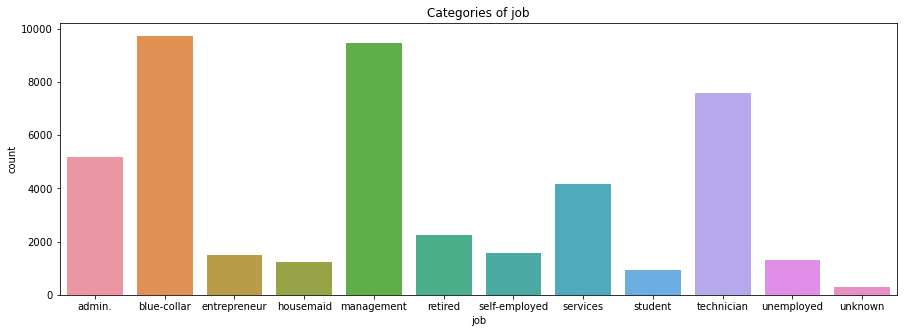

In [57]:
plt.figure(figsize=(15,5))  # we use the figure function from matplotlib to adjust the size of the plt
sns.countplot(x='job',data=Bank_marketing).set(title='Categories of job') # using countplot form searborn library to see the categories in the column

Inference: Majority of my samples are of blue-collar job  and next comes management.

[Text(0.5, 1.0, 'Categories of marital')]

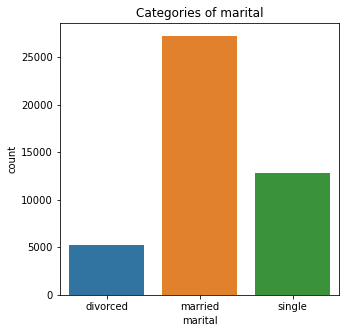

In [77]:
plt.figure(figsize=(5,5))  # we use the figure function from matplotlib to adjust the size of the plt
sns.countplot(x='marital',data=Bank_marketing).set(title='Categories of marital') # using countplot form searborn library to see the categories in the column

Inference: From the above plot we can see majority of samples of are customers who have been married.

[Text(0.5, 1.0, 'Categories of Education')]

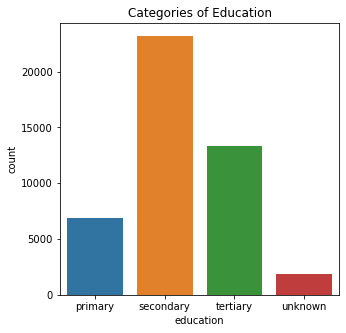

In [92]:
plt.figure(figsize=(5,5))  # we use the figure function from matplotlib to adjust the size of the plt
sns.countplot(x='education',data=Bank_marketing).set(title='Categories of Education') # using countplot form searborn library to see the categories in the column

Inference : From the above plot we can see that majority of the samples studied only upto to secondary education only.

[Text(0.5, 1.0, 'Categories of Default')]

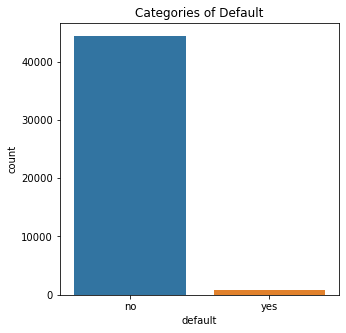

In [91]:
plt.figure(figsize=(5,5))  # we use the figure function from matplotlib to adjust the size of the plt
sns.countplot(x='default',data=Bank_marketing).set(title='Categories of Default') # using countplot form searborn library to see the categories in the column

Inference : From the above observations,i can say majority of the samples doesn't have credit in their account.

[Text(0.5, 1.0, 'Categories of Housing')]

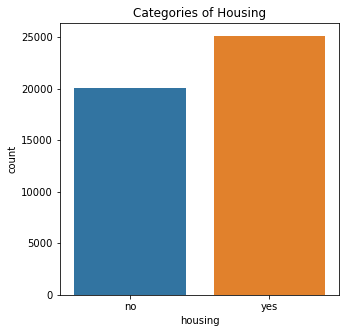

In [90]:
plt.figure(figsize=(5,5))  # we use the figure function from matplotlib to adjust the size of the plt
sns.countplot(x='housing',data=Bank_marketing).set(title='Categories of Housing') # using countplot form searborn library to see the categories in the column

Inference: From tha above observations, it is clear that majority of the samples have housing loan.

[Text(0.5, 1.0, 'Categories of LOAN')]

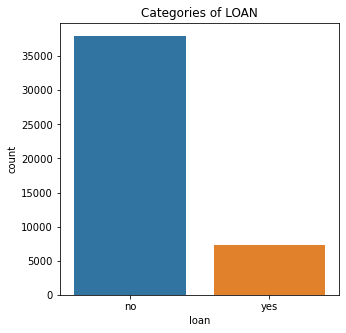

In [89]:
plt.figure(figsize=(5,5))  # we use the figure function from matplotlib to adjust the size of the plt
sns.countplot(x='loan',data=Bank_marketing).set(title='Categories of LOAN') # using countplot form searborn library to see the categories in the column

Inference : From the above plot, it is clear that majority of the samples doesnot have a personal loan.

[Text(0.5, 1.0, 'Categories of Contact')]

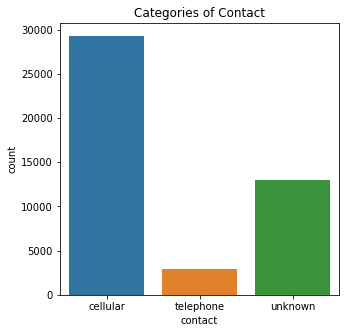

In [88]:
plt.figure(figsize=(5,5))  # we use the figure function from matplotlib to adjust the size of the plt
sns.countplot(x='contact',data=Bank_marketing).set(title='Categories of Contact') # using countplot form searborn library to see the categories in the colum

Inference: From the above plot , it is clear that majority of the samples are have been contacted through cellular.

[Text(0.5, 1.0, 'Categories of MONTH')]

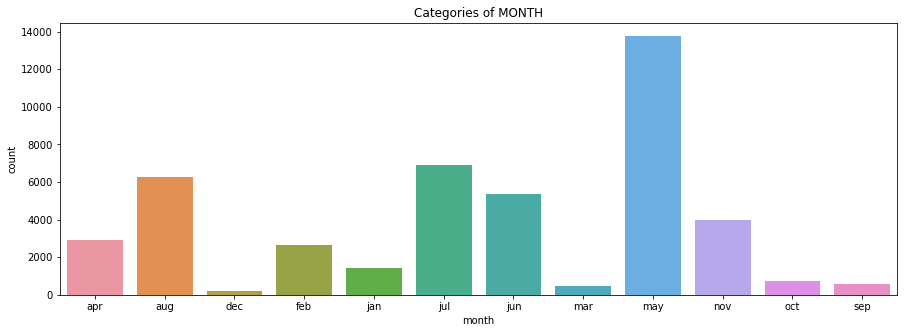

In [85]:
plt.figure(figsize=(15,5))  # we use the figure function from matplotlib to adjust the size of the plt
sns.countplot(x='month',data=Bank_marketing).set(title='Categories of MONTH') # using countplot form searborn library to see the categories in the colum

Inference: Majority of the samples last contacted in the month of the year is "may"

[Text(0.5, 1.0, 'Categories of Poutcome')]

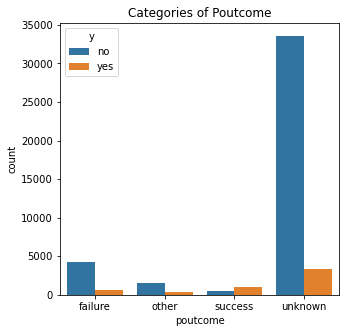

In [211]:
plt.figure(figsize=(5,5))  # we use the figure function from matplotlib to adjust the size of the plt
sns.countplot(x='poutcome',hue='y',data=Bank_marketing).set(title='Categories of Poutcome') # using countplot form searborn library to see the categories in the colum

Inference:From the above observations, it is clear that samples previous outcome about the campaign is unknown

[Text(0.5, 1.0, 'Categories of Y')]

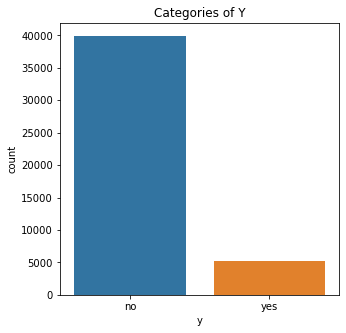

In [86]:
plt.figure(figsize=(5,5))  # we use the figure function from matplotlib to adjust the size of the plt
sns.countplot(x='y',data=Bank_marketing).set(title='Categories of Y') # using countplot form searborn library to see the categories in the colum

Inference: From the above plot, it is clear that majority of the samples have not opted for the term deposit.

### Univariate Analysis of Numerical Data

In [20]:
numericals=Bank_marketing.select_dtypes('int64').columns
numericals

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

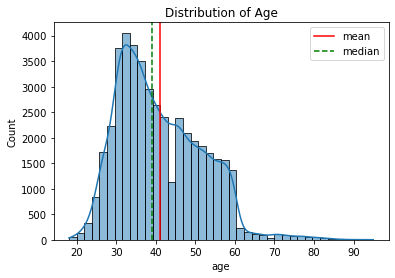

In [112]:
sns.histplot(x='age',data=Bank_marketing,kde=True,bins=40).set(title='Distribution of Age') # used histogram from seaborn library to see the distribution of data.
plt.axvline(x=Bank_marketing.age.mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axvline(x=Bank_marketing.age.median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

Inference: From the above figure we can see that mean is greater than median . Hence we can say that the data is Right skewed.

In [188]:
Bank_marketing['age'].mean() # chekcing mean value with help of mean function

40.93621021432837

In [187]:
Bank_marketing['age'].median()  # checking median value with the help of median function

39.0

In [189]:
Bank_marketing['age'].skew() # From the skewness value i can say the it is moderatelly right skewed.

0.6848179257252598

Inference: From the above skewness value , I can say that Age is marginally right skewed .

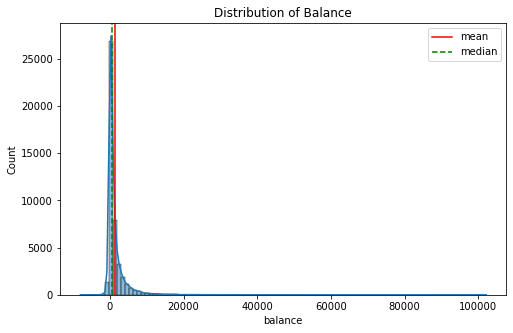

In [210]:
plt.figure(figsize=(8,5))
sns.histplot(x='balance',data=Bank_marketing,kde=True,bins=100).set(title='Distribution of Balance') # used histogram from seaborn library to see the distribution of data.
plt.axvline(x=Bank_marketing.balance.mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axvline(x=Bank_marketing.balance.median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

Inference: From this figure i can see the data has got a long right tail . Hence the data is Right skewed . It is difficult to see the mean and median values as they look similar. I will check them below and verify their values.

In [190]:
Bank_marketing['balance'].mean() # chekcing mean value with help of mean function

1362.2720576850766

In [191]:
Bank_marketing['balance'].median()  # checking median value with the help of median function

448.0

In [192]:
Bank_marketing['balance'].skew()  # checing the skewness value with the help of skew function

8.360308326166326

Inference : From the above  three mathematical observations of mean , median and skewness. It is clearly understood that the data is Right skewed. Finally i can say that the data is highly skewed.

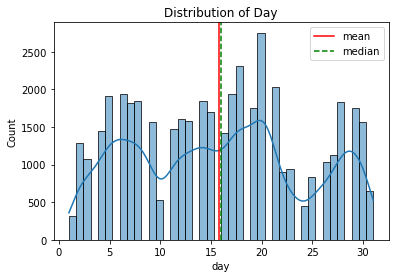

In [121]:
sns.histplot(x='day',data=Bank_marketing,kde=True).set(title='Distribution of Day') # used histogram from seaborn library to see the distribution of data.
plt.axvline(x=Bank_marketing.day.mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axvline(x=Bank_marketing.day.median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

Inference: From the above figure we can see that mean and median equal.I didn't find any right or left tails in the data. Hence the data is symmetrical.

In [185]:
Bank_marketing['day'].mean() # chekcing mean value with help of mean function

15.80641879188693

In [186]:
Bank_marketing['day'].median()  # checking median value with the help of median function

16.0

In [184]:
Bank_marketing['day'].skew()  # checing the skewness value with the help of skew function

0.09307901402122411

Inference : From the above the observations of the figure and skewness values. I can say that the data is symmetrical.

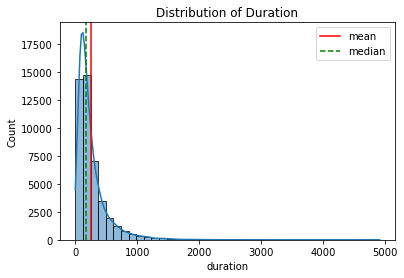

In [194]:
sns.histplot(x='duration',data=Bank_marketing,kde=True,bins=40).set(title='Distribution of Duration') # used histogram from seaborn library to see the distribution of data.
plt.axvline(x=Bank_marketing.duration.mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axvline(x=Bank_marketing.duration.median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

Inference:From the above figure I can see that mean is greater than medain and also i can see a long right tail. Hence the distribution of the 'duration' data is Right skewed.

In [197]:
Bank_marketing['duration'].mean() # chekcing mean value with help of mean function

258.1630797814691

In [196]:
Bank_marketing['duration'].median()  # checking median value with the help of median function

180.0

In [195]:
Bank_marketing['duration'].skew()  # checing the skewness value with the help of skew function

3.144318099423456

Inference: From the above skewness value. I can say that the 'duration' is  highly skewed.

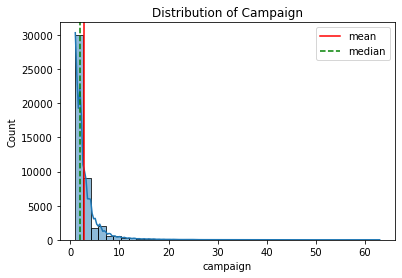

In [118]:
sns.histplot(x='campaign',data=Bank_marketing,kde=True,bins=40).set(title='Distribution of Campaign') # used histogram from seaborn library to see the distribution of data.
plt.axvline(x=Bank_marketing.campaign.mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axvline(x=Bank_marketing.campaign.median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

Inference:From the above figure i can see a long right tail and mean is greater than medain. Hence the data of 'campaign' is Right skewed.

In [199]:
Bank_marketing['campaign'].mean() # chekcing mean value with help of mean function

2.763840658246887

In [198]:
Bank_marketing['campaign'].median()  # checking median value with the help of median function

2.0

In [200]:
Bank_marketing['campaign'].skew()  # checing the skewness value with the help of skew function

4.898650166179674

Inference: From the above skewness value. I can say that 'campaign' is highly skewed.

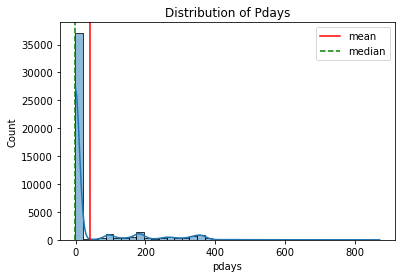

In [119]:
sns.histplot(x='pdays',data=Bank_marketing,kde=True,bins=40).set(title='Distribution of Pdays') # used histogram from seaborn library to see the distribution of data.
plt.axvline(x=Bank_marketing.pdays.mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axvline(x=Bank_marketing.pdays.median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

Inference: From the above figure. I can see that the mean is greater than median and long right tail is present . Hence the data is Right skewed.

In [203]:
Bank_marketing['pdays'].mean() # chekcing mean value with help of mean function

40.19782796222158

In [202]:
Bank_marketing['pdays'].median()  # checking median value with the help of median function

-1.0

In [201]:
Bank_marketing['pdays'].skew()  # checing the skewness value with the help of skew function

2.6157154736563477

Inference: From the above skewness value of the 'pdays' variable . It can be said that the data is highly skewed.

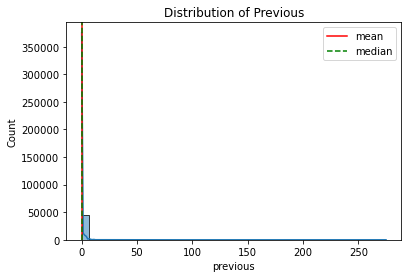

In [120]:
sns.histplot(x='previous',data=Bank_marketing,kde=True,bins=40).set(title='Distribution of Previous') # used histogram from seaborn library to see the distribution of data.
plt.axvline(x=Bank_marketing.previous.mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axvline(x=Bank_marketing.previous.median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

Inference : From the above figure we can see the data distribution has got long right tail. Hence the data is Right skewed. Here mean and median are  not clear.Hence i wil check them through values. 

In [204]:
Bank_marketing['previous'].mean() # chekcing mean value with help of mean function

0.5803233726305546

In [205]:
Bank_marketing['previous'].median()  # checking median value with the help of median function

0.0

In [206]:
Bank_marketing['previous'].skew()  # checing the skewness value with the help of skew function

41.84645447266292

Inference : From the skewness values. I can say that my data is Highly skewed.

In [436]:
Bank_marketing.skew().to_frame()

C:\Users\dsv24\AppData\Local\Temp/ipykernel_15804/3406590921.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Bank_marketing.skew().to_frame()


,0
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


Inference: All the variables are skewed except the days column.As we have data which is skewed we need to focus on the making it normal by dealing with outliers and by transformation techniques.

### Outliers

In [214]:
numericals

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

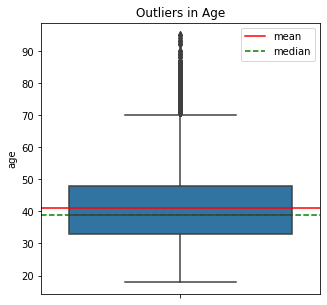

In [221]:
plt.figure(figsize=(5,5)) # used figure function to adjust the figure size.
sns.boxplot(y='age',data=Bank_marketing).set(title='Outliers in Age') # used boxplot to show the outliers present in the variable.
plt.axhline(y=Bank_marketing.age.mean(),color='r',label='mean')# used horizontal line to show mean of the data 
plt.axhline(y=Bank_marketing.age.median(),color='g',label='median',ls='--') # used horizontal line to show the median of the data.
plt.legend() # legend function enables labels on axis.

Inference: Outliers are clearly seen above the upper whisker .Hence 'Age' variables has outliers in it.

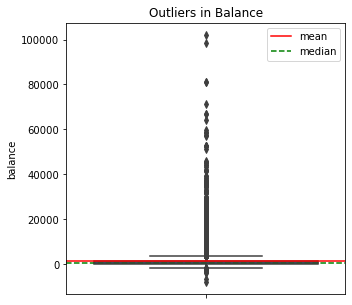

In [222]:
plt.figure(figsize=(5,5)) # used figure function to adjust the figure size.
sns.boxplot(y='balance',data=Bank_marketing).set(title='Outliers in Balance') # used boxplot to show the outliers present in the variable.
plt.axhline(y=Bank_marketing.balance.mean(),color='r',label='mean')# used horizontal line to show mean of the data 
plt.axhline(y=Bank_marketing.balance.median(),color='g',label='median',ls='--') # used horizontal line to show the median of the data.
plt.legend() # legend function enables labels on axis.

Inference: Outliers are seen in the above plot . Hence "Balance" column has outliers in it.

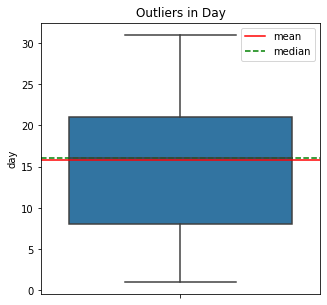

In [223]:
plt.figure(figsize=(5,5)) # used figure function to adjust the figure size.
sns.boxplot(y='day',data=Bank_marketing).set(title='Outliers in Day') # used boxplot to show the outliers present in the variable.
plt.axhline(y=Bank_marketing.day.mean(),color='r',label='mean')# used horizontal line to show mean of the data 
plt.axhline(y=Bank_marketing.day.median(),color='g',label='median',ls='--') # used horizontal line to show the median of the data.
plt.legend() # legend function enables labels on axis.

Inference : From the above plot, it is clear that there are no outliers in the "day" column.

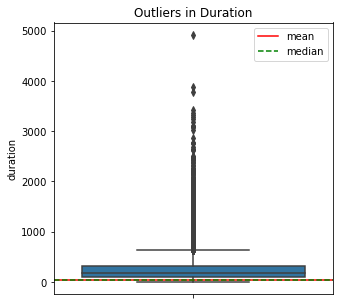

In [224]:
plt.figure(figsize=(5,5)) # used figure function to adjust the figure size.
sns.boxplot(y='duration',data=Bank_marketing).set(title='Outliers in Duration') # used boxplot to show the outliers present in the variable.
plt.axhline(y=Bank_marketing.age.mean(),color='r',label='mean')# used horizontal line to show mean of the data 
plt.axhline(y=Bank_marketing.age.median(),color='g',label='median',ls='--') # used horizontal line to show the median of the data.
plt.legend() # legend function enables labels on axis.

Inference: From the above plot, we can clearly see outliers in the "Duration". 

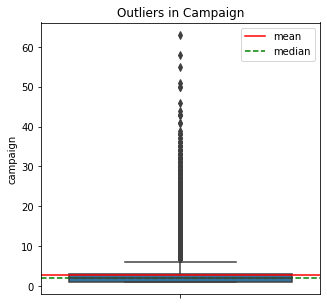

In [21]:
plt.figure(figsize=(5,5)) # used figure function to adjust the figure size.
sns.boxplot(y='campaign',data=Bank_marketing).set(title='Outliers in Campaign') # used boxplot to show the outliers present in the variable.
plt.axhline(y=Bank_marketing.campaign.mean(),color='r',label='mean')# used horizontal line to show mean of the data 
plt.axhline(y=Bank_marketing.campaign.median(),color='g',label='median',ls='--') # used horizontal line to show the median of the data.
plt.legend() # legend function enables labels on axis.

Inference: From the above plot, we can clearly see outliers in the "Campaign".

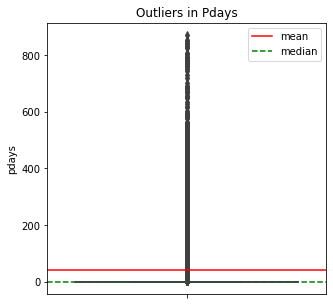

In [22]:
plt.figure(figsize=(5,5)) # used figure function to adjust the figure size.
sns.boxplot(y='pdays',data=Bank_marketing).set(title='Outliers in Pdays') # used boxplot to show the outliers present in the variable.
plt.axhline(y=Bank_marketing.pdays.mean(),color='r',label='mean')# used horizontal line to show mean of the data 
plt.axhline(y=Bank_marketing.pdays.median(),color='g',label='median',ls='--') # used horizontal line to show the median of the data.
plt.legend() # legend function enables labels on axis.

Inference: From the above plot, we can clearly see outliers in the "pdays".

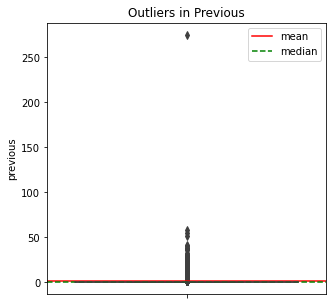

In [23]:
plt.figure(figsize=(5,5)) # used figure function to adjust the figure size.
sns.boxplot(y='previous',data=Bank_marketing).set(title='Outliers in Previous') # used boxplot to show the outliers present in the variable.
plt.axhline(y=Bank_marketing.previous.mean(),color='r',label='mean')# used horizontal line to show mean of the data 
plt.axhline(y=Bank_marketing.previous.median(),color='g',label='median',ls='--') # used horizontal line to show the median of the data.
plt.legend() # legend function enables labels on axis.

Inference: From the above plot, we can clearly see outliers in the "Previous".

Conclusion:Outliers are present in all the numericals variables except day . so we need to deal with outliers.

# Dealing with outliers

In [37]:
numericals

NameError: name 'numericals' is not defined

In [38]:
new_table=Bank_marketing.loc[:,['age','balance','day','duration','campaign','pdays','previous']] # created a new table to send all the numerical variables in it.

In [39]:
new_table # new_table with all numerical values.

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [40]:
a=new_table.skew().to_frame()
a.columns=['skewness_values']
a

,skewness_values
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


In [43]:
#python program to identify the skewed variables form all the numericals.
count=0
skewed_variables=[]
for i in a.skewness_values:
    if i>0.5 or i<-0.5:      # range of skewness values
        print(a.index[count])
        skewed_variables.append(a.index[count])    #Pushing into the list
        count+=1
    else:
        count+=1
        pass
print(skewed_variables)      # printing the skewed variables

age
balance
duration
campaign
pdays
previous
['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


### z score 

In [66]:
from scipy import stats
import numpy as np
# imported important libraries that are necessary for performing z transformation.
z = np.abs(stats.zscore(Bank_marketing[skewed_variables])) # peforming zscore on skewed variables
print(z)

            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577

[45211 rows x 6 columns]


In [67]:
threshold=3  # Setting threshold value to filter  outliers in skewed variables

In [68]:
print(np.where(z>3))

(array([   34,    37,    43, ..., 45204, 45208, 45210], dtype=int64), array([1, 2, 2, ..., 5, 2, 5], dtype=int64))


In [69]:
Bank_marketing_zscore = Bank_marketing[(z < 3).all(axis=1)] # filering the outliers by giving condition .

In [70]:
Bank_marketing_zscore.shape  # we can that no of rows are decreased aftere applying zscore.

(40209, 17)

In [71]:
Bank_marketing_zscore    # after apply zscore to all the skewed variables

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [72]:
Bank_marketing.shape 

(45211, 17)

[Text(0.5, 1.0, 'Outliers after applying zscore')]

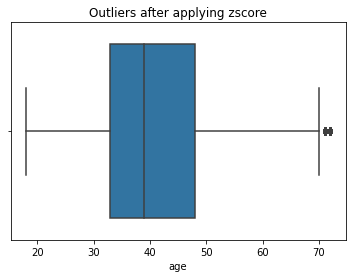

In [445]:
sns.boxplot(x='age',data=Bank_marketing_zscore).set(title='Outliers after applying zscore')

[Text(0.5, 1.0, 'Outliers after applying zscore')]

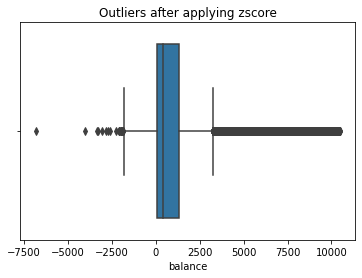

In [446]:
sns.boxplot(x='balance',data=Bank_marketing_zscore).set(title='Outliers after applying zscore')

[Text(0.5, 1.0, 'Outliers after applying zscore')]

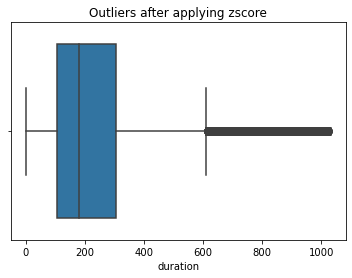

In [447]:
sns.boxplot(x='duration',data=Bank_marketing_zscore).set(title='Outliers after applying zscore')

[Text(0.5, 1.0, 'Outliers after applying zscore')]

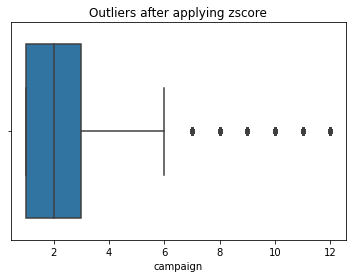

In [448]:
sns.boxplot(x='campaign',data=Bank_marketing_zscore).set(title='Outliers after applying zscore')

[Text(0.5, 1.0, 'Outliers after applying zscore')]

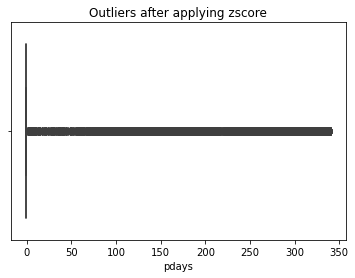

In [449]:
sns.boxplot(x='pdays',data=Bank_marketing_zscore).set(title='Outliers after applying zscore')

[Text(0.5, 1.0, 'Outliers after applying zscore')]

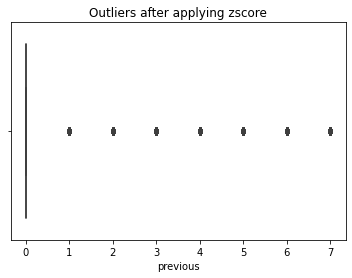

In [450]:
sns.boxplot(x='previous',data=Bank_marketing_zscore).set(title='Outliers after applying zscore')

Conclusion:From the above observations it is clear that outliers are present in all the skewed variables even after appling zscore.But the amount of outliers have been decreased significantly in some variables. 

### Boxcox Transformation

In [45]:
from scipy.special import boxcox1p   # as we are having zeros in the table I am using boxcox1p 
boxcox_transformation=Bank_marketing[skewed_variables].apply(lambda x: boxcox1p(x,0.25)) # converting all the variables into boxcox transformation

In [260]:
boxcox_transformation  # applied boxcox transformation to all the skewed variables.

,age,balance,duration,campaign,pdays,previous
0,7.085952,23.218625,12.092937,0.756828,-4.000000,0.000000
1,6.360080,5.361389,10.044972,0.756828,-4.000000,0.000000
2,5.658946,1.264296,7.849027,0.756828,-4.000000,0.000000
3,6.528592,20.922311,8.421691,0.756828,-4.000000,0.000000
4,5.658946,0.756828,11.023574,0.756828,-4.000000,0.000000
...,...,...,...,...,...,...
45206,6.741398,17.443961,18.368904,1.656854,-4.000000,0.000000
45207,7.651803,21.797137,14.494349,1.264296,-4.000000,0.000000
45208,7.692051,30.780278,19.181272,2.260338,10.752069,1.656854
45209,7.038676,16.343071,14.999380,1.981395,-4.000000,0.000000


In [261]:
boxcox_transformation.skew()   

age         0.249482
balance     0.341795
duration    0.394556
campaign    1.837935
pdays       1.738633
previous    3.058964
dtype: float64

Inference : From the above skewness values , it is clear that some variables became normally distributed and in some the skewness got reduceed which is good to see.

In [74]:
boxcox_transformation1=Bank_marketing_zscore[skewed_variables].apply(lambda x: boxcox1p(x,0.25)) # applied boxcox on zscore applied data.

In [75]:
boxcox_transformation1.skew() # chekcing skewness of zscore applied data.

age         0.111411
balance     0.033102
duration    0.119897
campaign    1.148100
pdays       2.144464
previous    2.821577
dtype: float64

Inference : From the above observations of the two skewness values of boxcox_transformation and boxcox_transformation1 we can only see slight difference.Applying trasformation  is more powerful method than dealing with outliers with zscore and IQR.

### Square_root transformation

In [77]:
square_root_transformation=Bank_marketing[skewed_variables].apply(lambda x : np.sqrt(x)) # applying square root transformation all the skewed variables.

C:\Users\dsv24\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [78]:
square_root_transformation.head() # square root transformation

,age,balance,duration,campaign,pdays,previous
0,7.615773,46.292548,16.155494,1.0,NaN,0.0
1,6.633250,5.385165,12.288206,1.0,NaN,0.0
2,5.744563,1.414214,8.717798,1.0,NaN,0.0
3,6.855655,38.807216,9.591663,1.0,NaN,0.0
4,5.744563,1.000000,14.071247,1.0,NaN,0.0


In [79]:
square_root_transformation.skew()  # the square root transformation also seems better than untransformed one.

age         0.382202
balance     1.901328
duration    1.173744
campaign    2.206992
pdays      -0.292640
previous    2.880045
dtype: float64

In [80]:
square_root_transformation1=Bank_marketing_zscore[skewed_variables].apply(lambda x: np.sqrt(x))  #applying square root transformation on zscore applied data.

C:\Users\dsv24\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [274]:
square_root_transformation1.skew() 

age         0.216367
balance     0.991530
duration    0.669212
campaign    1.238204
pdays      -0.692013
previous    2.534639
dtype: float64

Inference : From the above observations of the two skewness values of square_root_transformation and square_root_transformation1, we can only see slight difference.Applying transformation  is more powerful method than dealing with outliers with zscore and IQR.

In [265]:
square_root_transformation['pdays'].value_counts(normalize=True,dropna=False)*100

NaN          81.736745
13.490738     0.369379
9.591663      0.325142
9.539392      0.278693
13.527749     0.278693
               ...    
21.189620     0.002212
21.260292     0.002212
25.455844     0.002212
24.392622     0.002212
23.021729     0.002212
Name: pdays, Length: 559, dtype: float64

Inference: From the above we can see that 81% of my values are NaN in "pdays" column after square_root_transformation.Hence i feel these column is not important in predicting my output.

### Analysing the data 

In [280]:
categories

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [281]:
numericals

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [282]:
Bank_marketing.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [213]:
Bank_marketing['job'].value_counts().to_frame() # blue-collar has the no of unique values.

,job
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303
housemaid,1240


In [166]:
Bank_marketing.groupby(['job','marital'])['balance'].mean().sort_values()# used groupby function to see the combination of things.

job            marital 
blue-collar    divorced     820.806667
services       divorced     834.304189
admin.         divorced     878.333333
services       single       887.324708
technician     divorced     924.048649
admin.         single      1020.739005
blue-collar    single      1056.105263
services       married     1088.847528
student        divorced    1101.000000
blue-collar    married     1113.165901
entrepreneur   divorced    1155.983240
student        married     1164.796296
housemaid      married     1248.173246
entrepreneur   single      1248.235294
admin.         married     1281.409580
technician     single      1283.938168
               married     1307.399556
retired        single      1360.388889
student        single      1403.753986
unemployed     divorced    1409.643275
self-employed  single      1410.365471
unemployed     single      1484.079800
retired        divorced    1507.835294
unemployed     married     1568.632011
housemaid      divorced    1573.222826
m

Inference: From the above groupby function we can self-employed with marital status divorced had highest balance. We will see that through graphs also .

In [466]:
Bank_marketing.groupby('job')['balance'].mean().sort_values()

job
services          997.088108
blue-collar      1078.826654
admin.           1135.838909
technician       1252.632092
student          1388.060768
housemaid        1392.395161
entrepreneur     1521.470074
unemployed       1521.745971
self-employed    1647.970868
management       1763.616832
unknown          1772.357639
retired          1984.215106
Name: balance, dtype: float64

### Bivariant Analysis

### categorical and numerical 

<AxesSubplot:xlabel='job', ylabel='balance'>

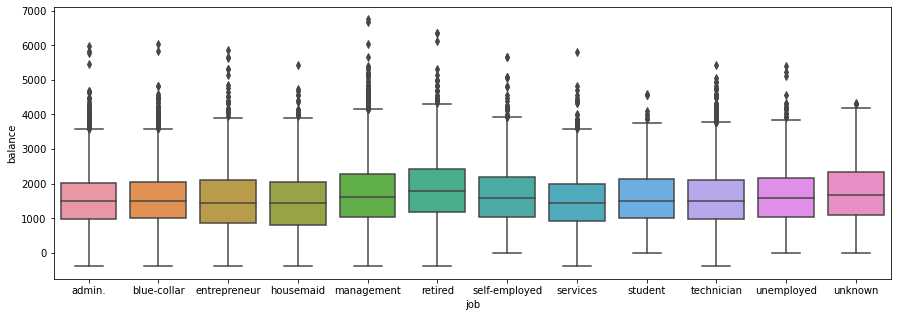

In [463]:
plt.figure(figsize=(15,5))
sns.boxplot(x='job',y=boxcox_transformation['balance']*100,data=Bank_marketing).set(title='Balances maintained across various jobs') # used barplot to see the distribution of jobs with balance 

Inference:From the above boxplot it is clear that people with retired form have more balance.Unknown is second and management is third.

[Text(0.5, 1.0, 'age distribution across various jobs')]

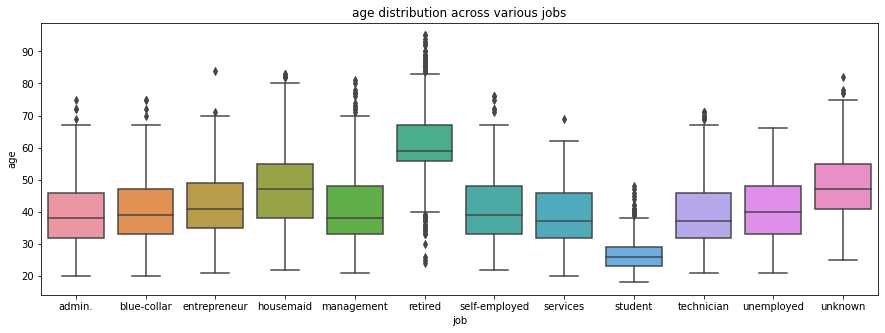

In [471]:
plt.figure(figsize=(15,5))
sns.boxplot(x=Bank_marketing['job'],y=Bank_marketing['age']).set(title='age distribution across various jobs') # used barplot to see the distribution of jobs with age 

In [ ]:
Inference : From the above plot it is clear that the median of age is high in retired comparitive to remaining variables.

[Text(0.5, 1.0, 'Duration of call with respective to various jobs')]

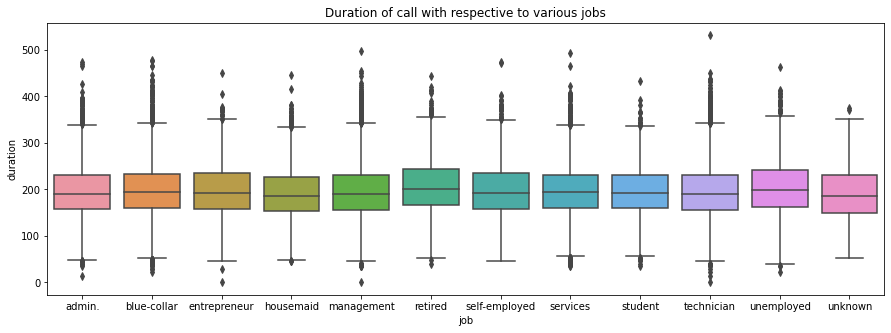

In [487]:
plt.figure(figsize=(15,5))
sns.boxplot(x=Bank_marketing['job'],y=boxcox_transformation['duration']*18).set(title='Duration of call with respective to various jobs') # used barplot to see the distribution of jobs with age

Inference : duration of call is more with retired people and second is unemployed people as they are free to talk maybe.

In [479]:
Bank_marketing.groupby('job')['duration'].median().sort_values()

job
housemaid        163.0
unknown          165.0
management       173.0
admin.           174.0
technician       176.0
entrepreneur     178.0
self-employed    179.0
student          180.0
blue-collar      186.0
services         186.0
unemployed       200.0
retired          204.0
Name: duration, dtype: float64

[Text(0.5, 1.0, 'Distribution of days across Months')]

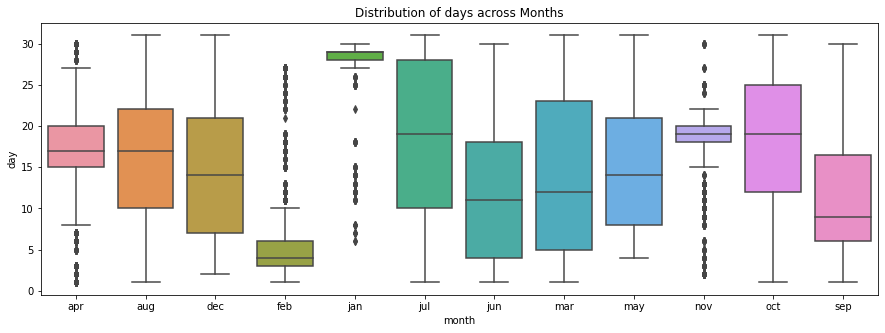

In [500]:
plt.figure(figsize=(15,5))
sns.boxplot(x=Bank_marketing['month'],y=Bank_marketing['day'],data=Bank_marketing).set(title='Distribution of days across Months') # used barplot to see the distribution of jobs with age

Inference: We can see the distribution of days across the months.

In [492]:
Bank_marketing.groupby('month')['day'].median().sort_values()

month
feb     4.0
sep     9.0
jun    11.0
mar    12.0
dec    14.0
may    14.0
apr    17.0
aug    17.0
jul    19.0
nov    19.0
oct    19.0
jan    29.0
Name: day, dtype: float64

### Categorical Vs Categorical 

<AxesSubplot:xlabel='job', ylabel='count'>

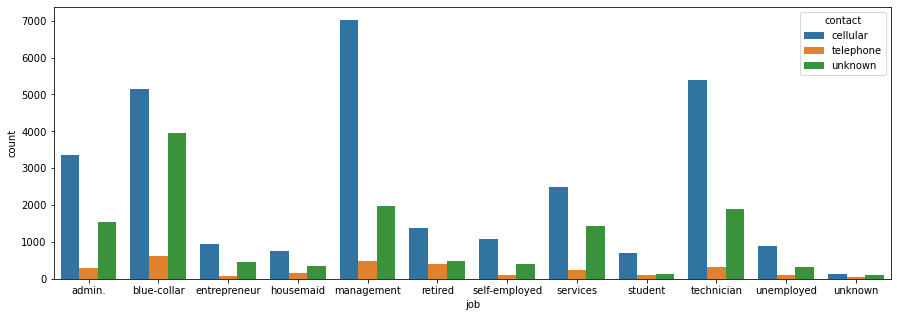

In [287]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',hue='contact',data=Bank_marketing)

Inference: From the above figure we can see that contact through cell is more in management job  and for telephone the blue-collar is more.when it comes unknow type , contact is more in blue-collar.

<AxesSubplot:xlabel='month', ylabel='count'>

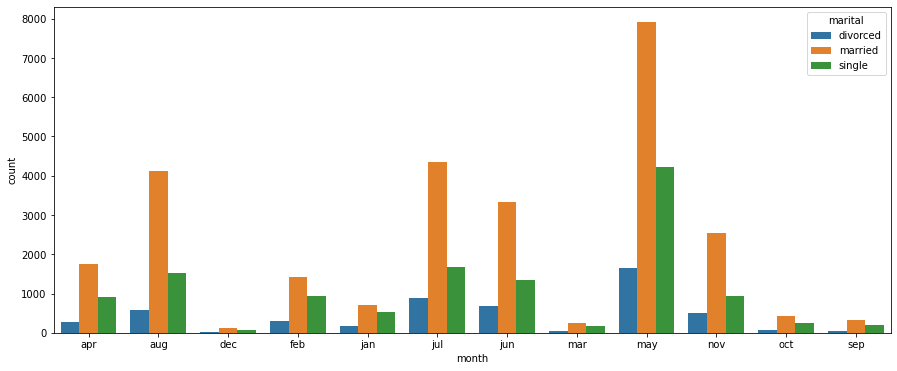

In [291]:
plt.figure(figsize=(15,6))
sns.countplot(x='month',hue='marital',data=Bank_marketing)

Inference:From the above plot it is clear that  the no of samples with married,sigle and divorced status are higher in may month.

<AxesSubplot:xlabel='job', ylabel='count'>

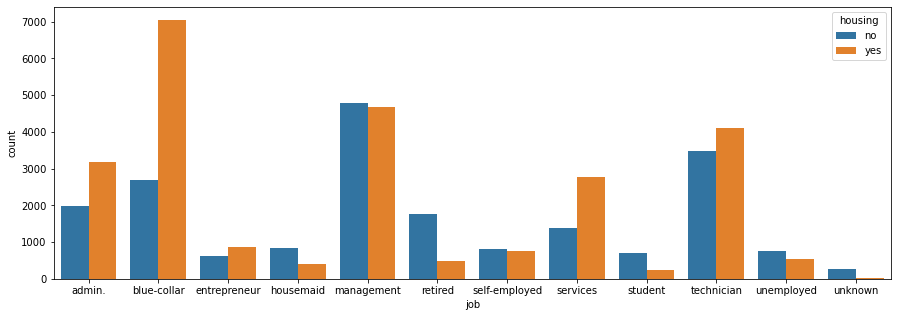

In [352]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',hue='housing',data=Bank_marketing)

Inference: From the above plot it is clear that people with blue-collar job have more housing loans and students have less housing loans.

<AxesSubplot:xlabel='job', ylabel='count'>

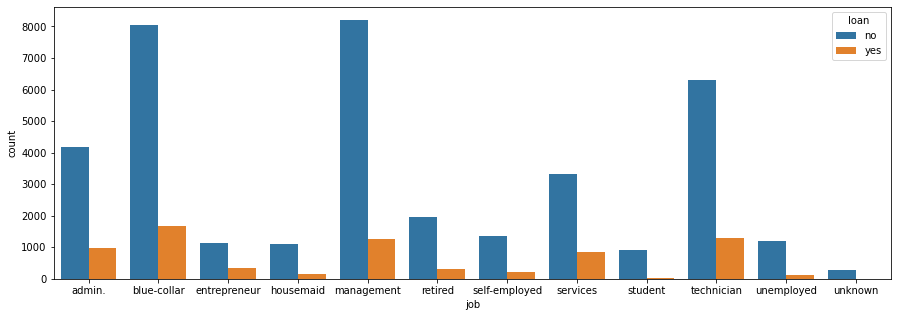

In [355]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',hue='loan',data=Bank_marketing)

Inference : From the above plot it is clear that people with management job have no personal loans. Personal loans are high for blue-collar job.

<AxesSubplot:xlabel='job', ylabel='count'>

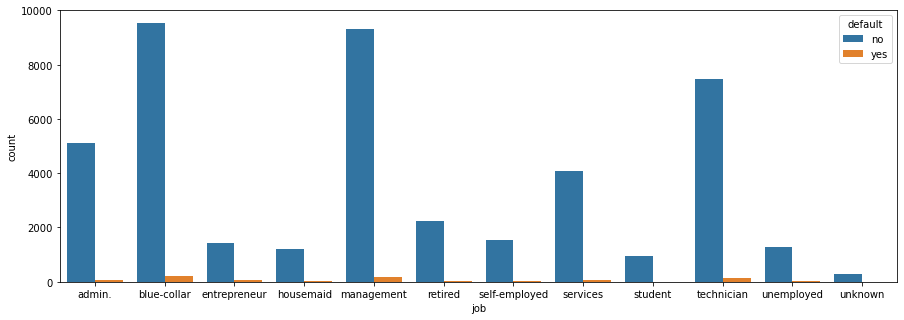

In [356]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',hue='default',data=Bank_marketing)

Inference:Majority of people doing various jobs doesn't have credit in their accounts. 

<AxesSubplot:xlabel='job', ylabel='count'>

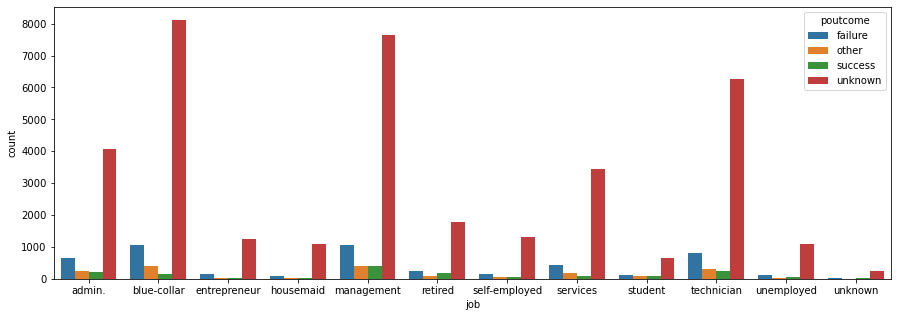

In [357]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',hue='poutcome',data=Bank_marketing)

Inference: Majority of the jobs doesnt have the detail of the previous campaign outcome.

<AxesSubplot:xlabel='job', ylabel='count'>

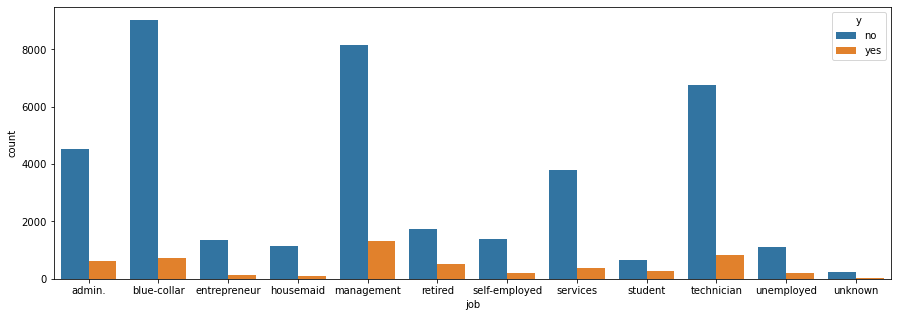

In [361]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',hue='y',data=Bank_marketing)

Inference: The term deposit is declined more by blue-collar and management jobs. It is accepted more by management jobs.

[Text(0.5, 1.0, 'job vs education')]

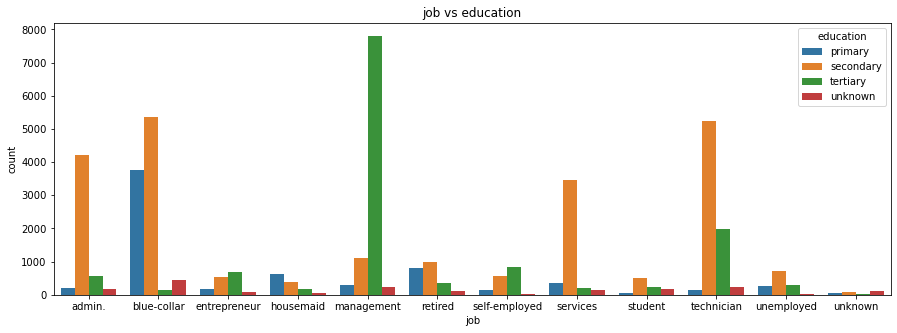

In [195]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',hue='education',data=Bank_marketing).set(title='job vs education')

Inference: Teritary education is done more in  people doing management jobs and technician jobs have done more secondary education.

<AxesSubplot:xlabel='job', ylabel='count'>

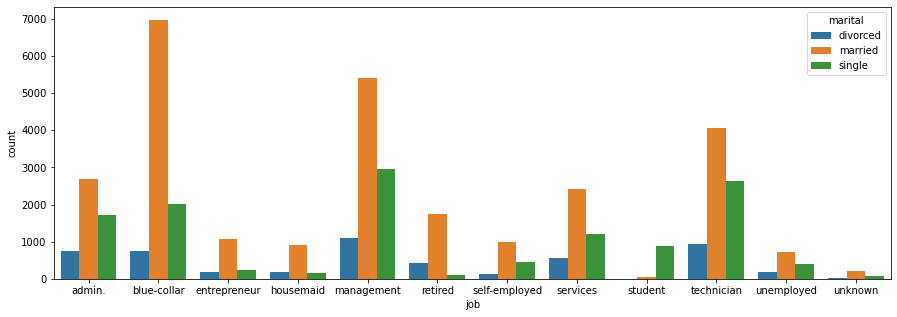

In [363]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',hue='marital',data=Bank_marketing)

Inference: Majority of the samples in the blue-collar job have marital status married and in management divorced people are more.

[Text(0.5, 1.0, 'jobs with respective target variable')]

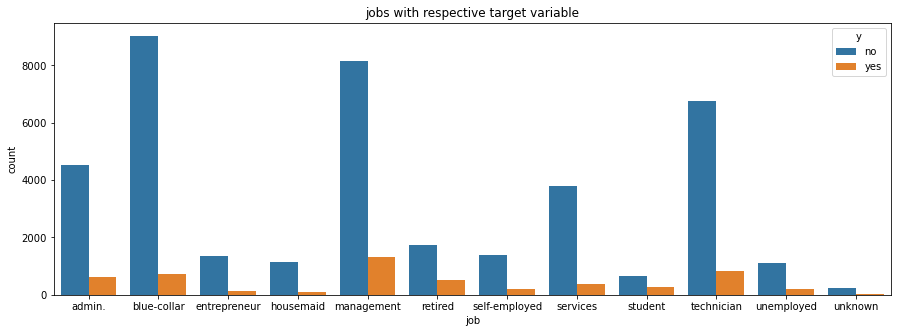

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',hue='y',data=Bank_marketing).set(title='jobs with respective target variable')

[Text(0.5, 1.0, 'Marital Vs target variable')]

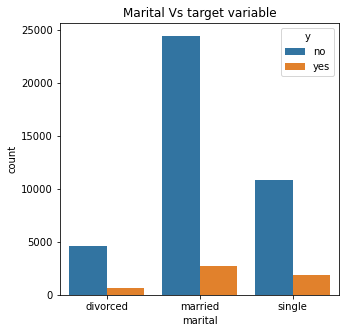

In [193]:
plt.figure(figsize=(5,5))
sns.countplot(x='marital',hue='y',data=Bank_marketing).set(title='Marital Vs target variable')

[Text(0.5, 1.0, 'Education with respective target variable')]

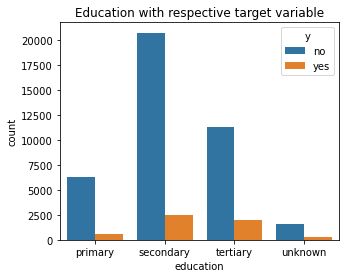

In [198]:
plt.figure(figsize=(5,4))
sns.countplot(x='education',hue='y',data=Bank_marketing).set(title='Education with respective target variable')

[Text(0.5, 1.0, 'jobs with respective target variable')]

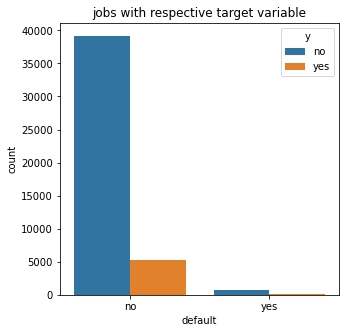

In [179]:
plt.figure(figsize=(5,5))
sns.countplot(x='default',hue='y',data=Bank_marketing).set(title='jobs with respective target variable')

[Text(0.5, 1.0, 'Housing loan  vs target variable')]

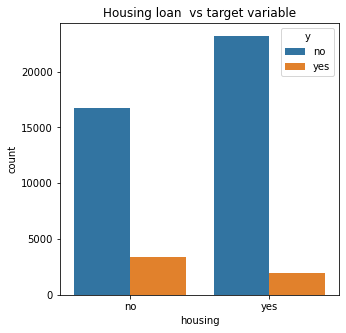

In [199]:
plt.figure(figsize=(5,5))
sns.countplot(x='housing',hue='y',data=Bank_marketing).set(title='Housing loan  vs target variable')

[Text(0.5, 1.0, 'Loan Vs target variable')]

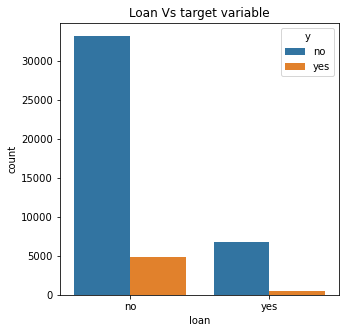

In [224]:
plt.figure(figsize=(5,5))
sns.countplot(x='loan',hue='y',data=Bank_marketing).set(title='Loan Vs target variable')

### Multivariate Analysis

<AxesSubplot:xlabel='job', ylabel='balance'>

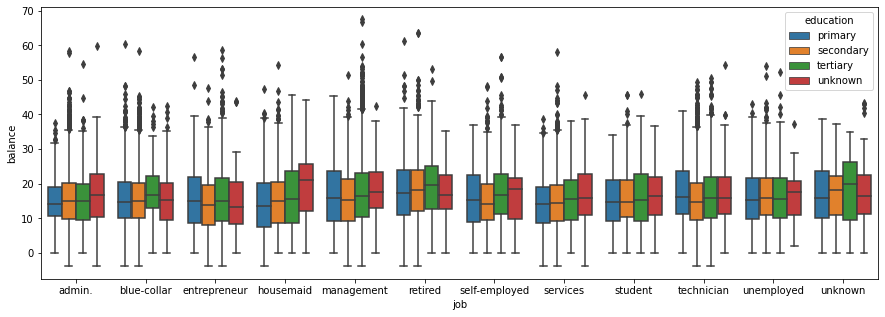

In [504]:
plt.figure(figsize=(15,5))
sns.boxplot(x='job',y=boxcox_transformation['balance'],hue='education',data=Bank_marketing)

Inference:From the above plot we can see that the balance maintained by people with different jobs and also with different education.

<AxesSubplot:xlabel='job', ylabel='balance'>

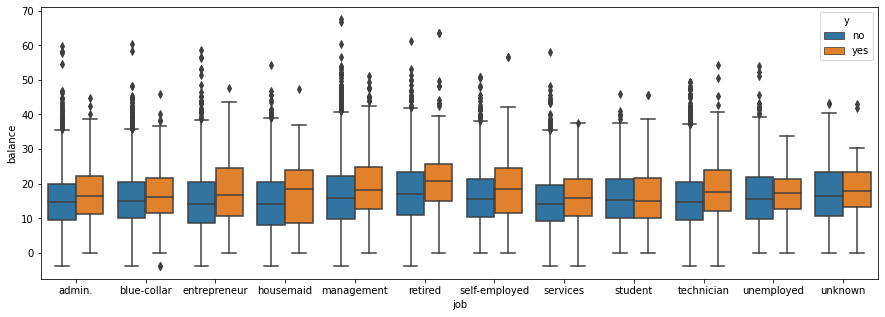

In [187]:
plt.figure(figsize=(15,5))
sns.boxplot(x='job',y=boxcox_transformation['balance'],hue='y',data=Bank_marketing)

<AxesSubplot:xlabel='education', ylabel='balance'>

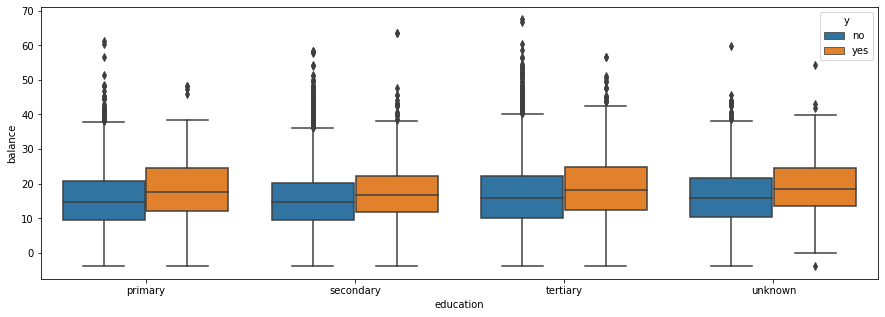

In [190]:
plt.figure(figsize=(15,5))
sns.boxplot(x='education',y=boxcox_transformation['balance'],hue='y',data=Bank_marketing)

<AxesSubplot:xlabel='job', ylabel='balance'>

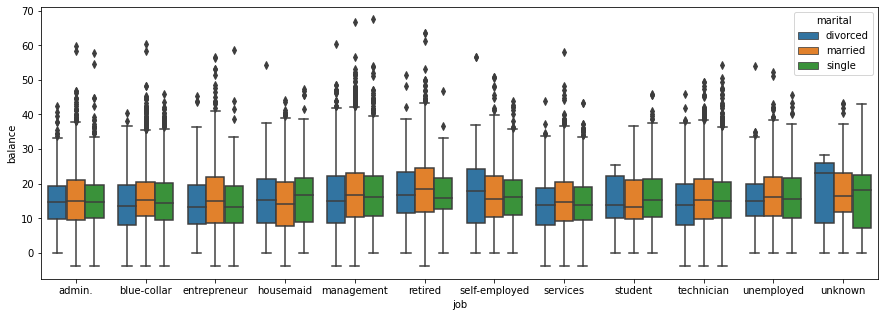

In [157]:
plt.figure(figsize=(15,5))
sns.boxplot(x='job',y=boxcox_transformation['balance'],hue='marital',data=Bank_marketing)

Inference:From the above plot we can see the balance maintained by various jobs with different marital status.

<AxesSubplot:xlabel='job', ylabel='campaign'>

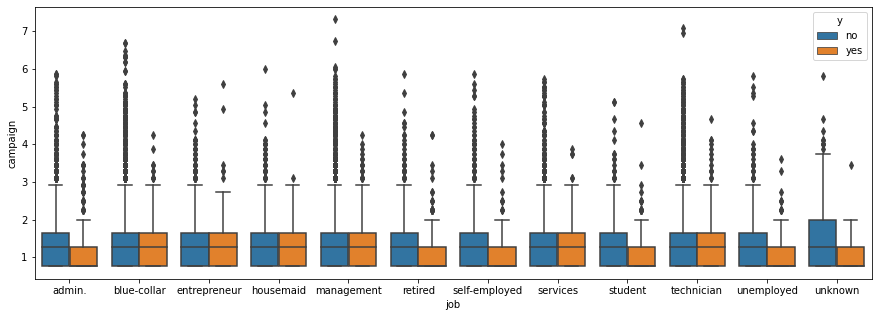

In [171]:
plt.figure(figsize=(15,5))
sns.boxplot(x='job',y=boxcox_transformation['campaign'],hue='y',data=Bank_marketing)

<AxesSubplot:xlabel='job', ylabel='previous'>

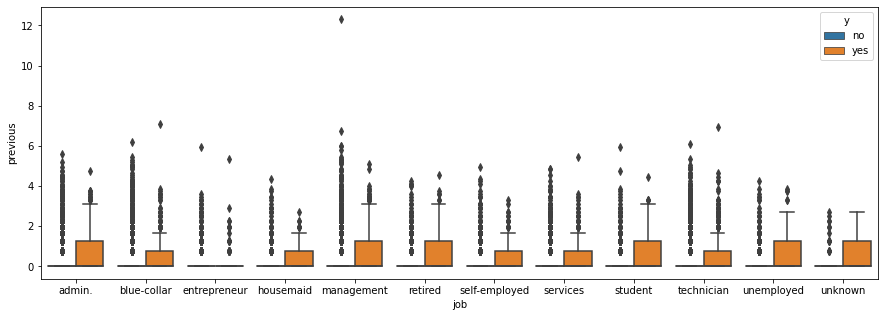

In [173]:
plt.figure(figsize=(15,5))
sns.boxplot(x='job',y=boxcox_transformation['previous'],hue='y',data=Bank_marketing)

[Text(0.5, 1.0, 'Relationship between two variables')]

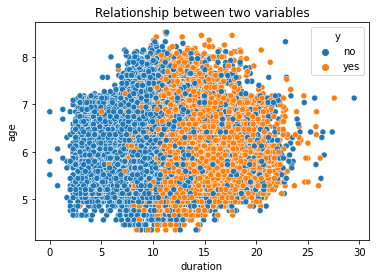

In [162]:
sns.scatterplot(x=boxcox_transformation['duration'],y=boxcox_transformation['age'],hue='y',data=Bank_marketing).set(title='Relationship between two variables')

Inference:From the above plot we can see that the duration between 10s and 20s, we can see the subscription of term deposit.There is no realtionship found between age and relationship.From this we can say that subscription are done only after proper negotiation.

In [521]:
Bank_marketing['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

[Text(0.5, 1.0, 'Relationship between two variables')]

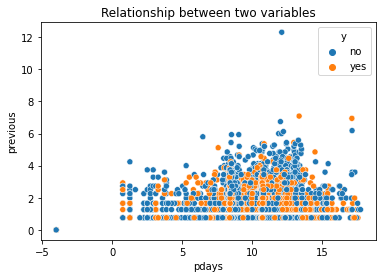

In [507]:
sns.scatterplot(x=boxcox_transformation['pdays'],y=boxcox_transformation['previous'],hue='y',data=Bank_marketing).set(title='Relationship between two variables')

Inference:There is no proper pattern observed between these variables.Hence this variables may not be useful in prediction.

<AxesSubplot:xlabel='pdays', ylabel='previous'>

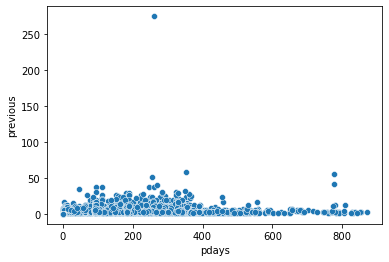

In [163]:
sns.scatterplot(x='pdays',y='previous',data=Bank_marketing)

In [166]:
Bank_marketing['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

[Text(0.5, 1.0, 'Relationship between two variables')]

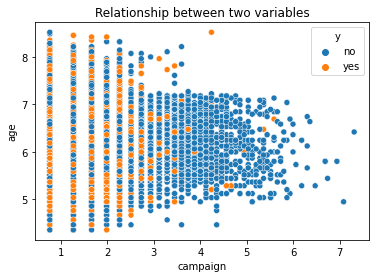

In [509]:
sns.scatterplot(x=boxcox_transformation['campaign'],y=boxcox_transformation['age'],hue='y',data=Bank_marketing).set(title='Relationship between two variables')

Inference:From the above figure,i can say less contacted people for the campaign across various ages opted for subscription.

[Text(0.5, 1.0, 'Relationship between two variables')]

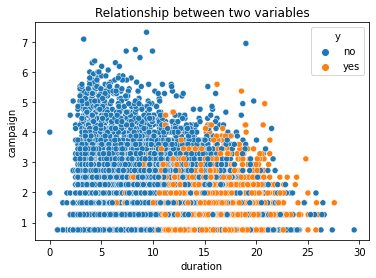

In [510]:
sns.scatterplot(x=boxcox_transformation['duration'],y=boxcox_transformation['campaign'],hue='y',data=Bank_marketing).set(title='Relationship between two variables')

Inference:Here also we can see the duration is between 10 and 20 and  campaign is less ie.no of contacts performed by the clients during this campaign. if no of contacts is less and the duration is between 10 and 20 the probablility of term subscription is high.

[Text(0.5, 1.0, 'Relationship between two variables')]

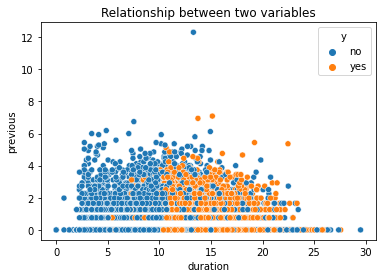

In [511]:
sns.scatterplot(x=boxcox_transformation['duration'],y=boxcox_transformation['previous'],hue='y',data=Bank_marketing).set(title='Relationship between two variables')

Inference:There is correlationship between this two variables.we can see the term deposit for customers who are less contacted in the previous  and the duration between 10 and 20.

[Text(0.5, 1.0, 'Relationship between two variables')]

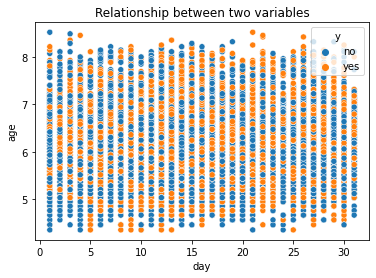

In [512]:
sns.scatterplot(x='day',y=boxcox_transformation['age'],hue='y',data=Bank_marketing).set(title='Relationship between two variables')

Inference:This is no relationship between this variables . Hence these variables are not useful to us.

[Text(0.5, 1.0, 'Relationship between two variables')]

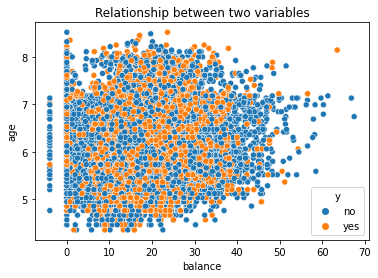

In [513]:
sns.scatterplot(x=boxcox_transformation['balance'],y=boxcox_transformation['age'],hue='y',data=Bank_marketing).set(title='Relationship between two variables')

Inference:Ther is no proper pattern observed all the points are randomly scattered.Hence these two will be difficult to predict the output.

In [207]:
Bank_marketing['duration'].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64

[Text(0.5, 1.0, 'Relationship between two variables')]

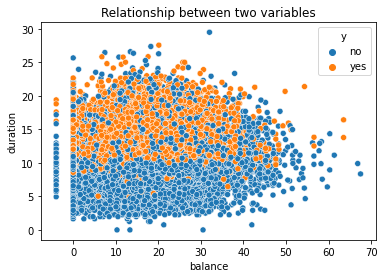

In [514]:
sns.scatterplot(x=boxcox_transformation['balance'],y=boxcox_transformation['duration'],hue='y',data=Bank_marketing).set(title='Relationship between two variables')

Inference:The duration between 10 and 20 . And the balance upto 40 can be helpful in getting the term deposit.

In [304]:
Bank_marketing.corr(method='spearman')  # as there are outliers in the dataset even after transforming i am going with spearman rank correlation.

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.096380,-0.008948,-0.033257,0.037136,-0.017468,-0.011900
balance,0.096380,1.000000,0.001329,0.042651,-0.030959,0.069676,0.079536
day,-0.008948,0.001329,1.000000,-0.058142,0.139581,-0.092226,-0.087780
duration,-0.033257,0.042651,-0.058142,1.000000,-0.107962,0.028698,0.031175
campaign,0.037136,-0.030959,0.139581,-0.107962,1.000000,-0.112284,-0.108448
pdays,-0.017468,0.069676,-0.092226,0.028698,-0.112284,1.000000,0.985645
previous,-0.011900,0.079536,-0.087780,0.031175,-0.108448,0.985645,1.000000


<AxesSubplot:>

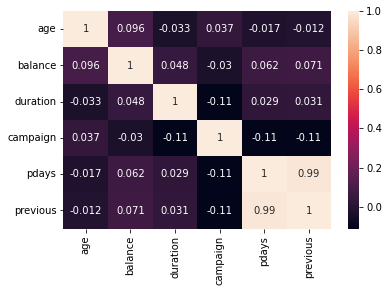

In [527]:
sns.heatmap(data=boxcox_transformation[skewed_variables].corr(method="spearman"),annot=True)

Inference: There is no correlation found between the variables except pdays and previous.

### Relationship between Numerical variable Vs Target Variable

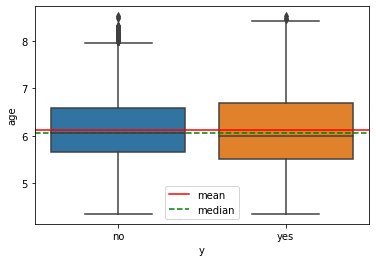

In [415]:
sns.boxplot(y=boxcox_transformation['age'],x=Bank_marketing['y'],data=Bank_marketing)
plt.axhline(y=boxcox_transformation.age.mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axhline(y= boxcox_transformation.age.median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

Inference:From the plot it is clear that age doesn't help in predicting the target variable

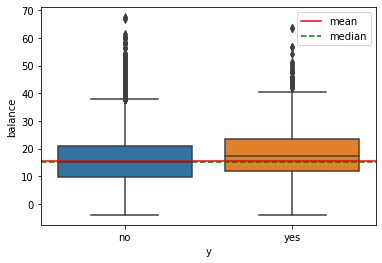

In [416]:
sns.boxplot(y=boxcox_transformation['balance'],x=Bank_marketing['y'],data=Bank_marketing)
plt.axhline(y=boxcox_transformation.balance.mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axhline(y=boxcox_transformation.balance.median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

Inference:From the above plot it is clear seen that balance is helpful in identifying the target variable.

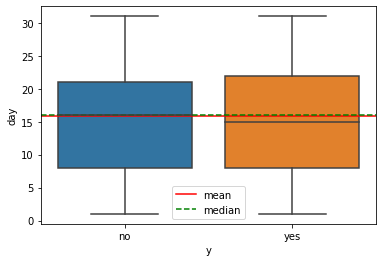

In [333]:
sns.boxplot(y=Bank_marketing['day'],x=Bank_marketing['y'],data=Bank_marketing)
plt.axhline(y=Bank_marketing.day.mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axhline(y=Bank_marketing.day.median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

Inference:From the above plot it is clear that day doesn't help in predicting the target variable.

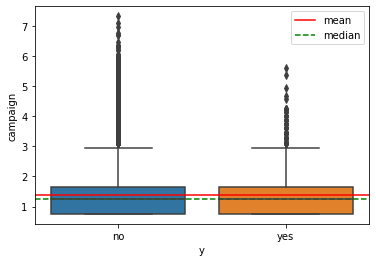

In [417]:
sns.boxplot(y=boxcox_transformation['campaign'],x=Bank_marketing['y'],data=Bank_marketing)
plt.axhline(y=boxcox_transformation.campaign.mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axhline(y=boxcox_transformation.campaign.median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

Inference: From the above plot it is clear that campaign doesn't help in identifying the target variable.

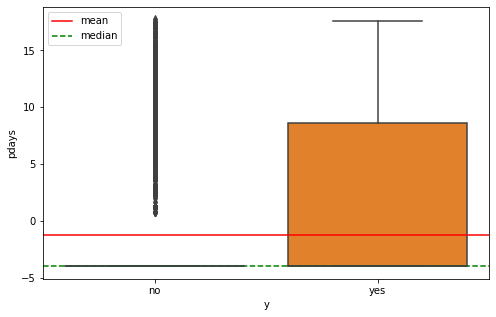

In [421]:
plt.figure(figsize=(8,5))
sns.boxplot(y=boxcox_transformation['pdays'],x=Bank_marketing['y'],data=Bank_marketing)
plt.axhline(y=boxcox_transformation.pdays.mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axhline(y=boxcox_transformation.pdays.median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

Inference:From the above plot it is clear that if there are pdays, it will be helpful in prediction of the "y".

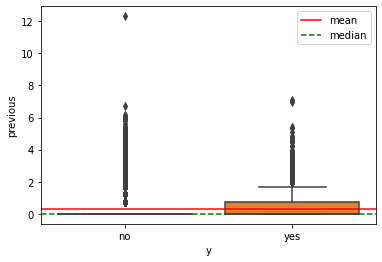

In [422]:
sns.boxplot(y=boxcox_transformation['previous'],x=Bank_marketing['y'],data=Bank_marketing)
plt.axhline(y=boxcox_transformation.previous.mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axhline(y=boxcox_transformation.previous.median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

Inference:From the above plot we can see the distribution of the  previous column

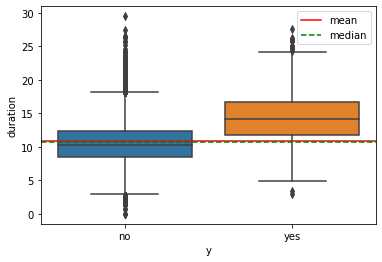

In [423]:
sns.boxplot(y=boxcox_transformation['duration'],x=Bank_marketing['y'],data=Bank_marketing)
plt.axhline(y=boxcox_transformation.duration.mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axhline(y=boxcox_transformation.duration.median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

Inference: From the plot it is clear that duration is helpful in predicting the target variable.

In [369]:
Bank_marketing.groupby('job')['campaign'].sum()

job
admin.           13317
blue-collar      27415
entrepreneur      4163
housemaid         3498
management       27091
retired           5313
self-employed     4505
services         11292
student           2157
technician       22083
unemployed        3169
unknown            953
Name: campaign, dtype: int64

<AxesSubplot:xlabel='job', ylabel='duration'>

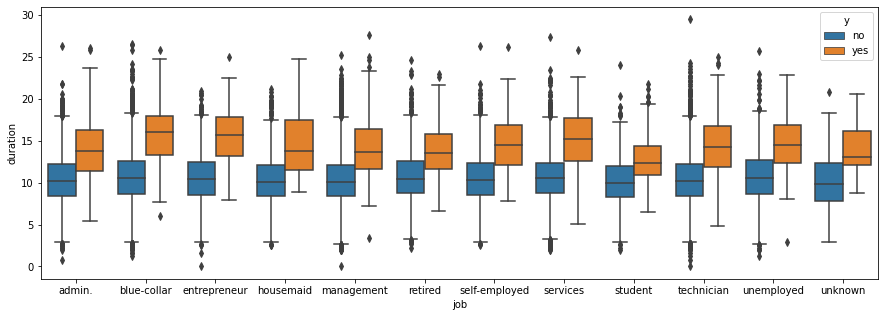

In [544]:
plt.figure(figsize=(15,5))
sns.boxplot(x=Bank_marketing['job'],y=boxcox_transformation['duration'],hue=Bank_marketing['y'])

Inference: From the above plot we can see the distribution of yes and no across duration.

<AxesSubplot:xlabel='marital', ylabel='pdays'>

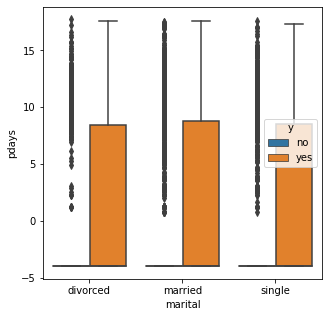

In [545]:
plt.figure(figsize=(5,5))
sns.boxplot(x=Bank_marketing['marital'],y=boxcox_transformation['pdays'],hue=Bank_marketing['y'])

Inference:From the above we can see the distribution of pdays column

<AxesSubplot:xlabel='education', ylabel='previous'>

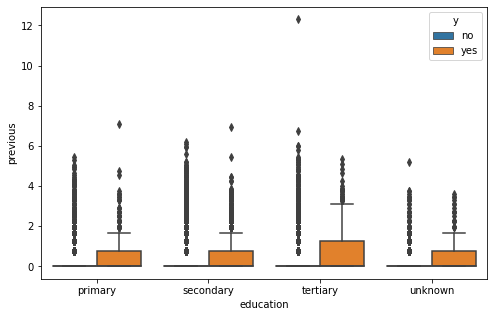

In [546]:
plt.figure(figsize=(8,5))
sns.boxplot(x='education',y=boxcox_transformation['previous'],hue='y',data=Bank_marketing)

Inference:From the above column we can see the distribution of previous columns

<AxesSubplot:xlabel='loan', ylabel='campaign'>

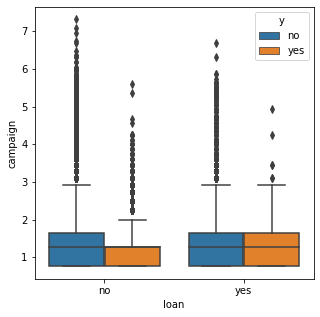

In [535]:
plt.figure(figsize=(5,5))
sns.boxplot(x='loan',y=boxcox_transformation['campaign'],hue='y',data=Bank_marketing)

Inference:From the above plot we can the distribution of campaign .

<AxesSubplot:xlabel='housing', ylabel='campaign'>

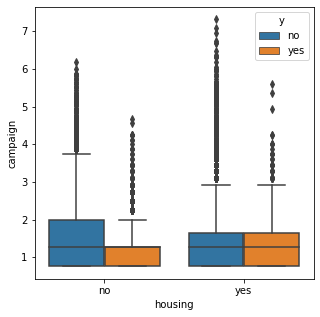

In [185]:
plt.figure(figsize=(5,5))
sns.boxplot(x='housing',y=boxcox_transformation['campaign'],hue='y',data=Bank_marketing)

Inference:From the above plot we can the distribution of campaign .

<AxesSubplot:xlabel='loan', ylabel='balance'>

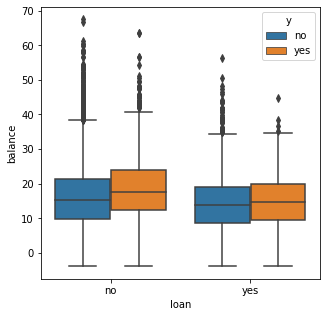

In [186]:
plt.figure(figsize=(5,5))
sns.boxplot(x='loan',y=boxcox_transformation['balance'],hue='y',data=Bank_marketing)

<AxesSubplot:xlabel='default', ylabel='campaign'>

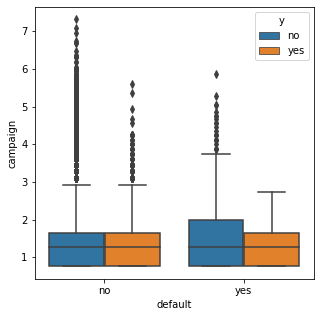

In [538]:
plt.figure(figsize=(5,5))
sns.boxplot(x='default',y=boxcox_transformation['campaign'],hue='y',data=Bank_marketing)

Inference:From the above plot we can the distribution of campaign .

<AxesSubplot:xlabel='poutcome', ylabel='campaign'>

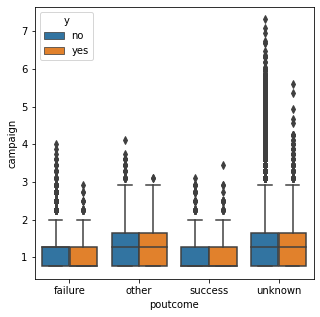

In [539]:
plt.figure(figsize=(5,5))
sns.boxplot(x='poutcome',y=boxcox_transformation['campaign'],hue='y',data=Bank_marketing)

Inference:From the above plot we can the distribution of campaign .

<AxesSubplot:xlabel='contact', ylabel='campaign'>

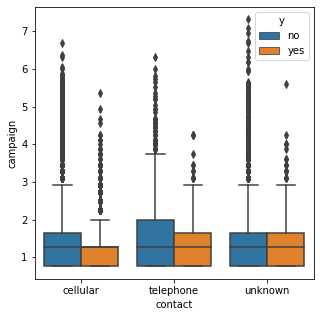

In [552]:
plt.figure(figsize=(5,5))
sns.boxplot(x='contact',y=boxcox_transformation['campaign'],hue='y',data=Bank_marketing)

Inference: From the above plot we can see the distribution of camapign.

<AxesSubplot:xlabel='month', ylabel='duration'>

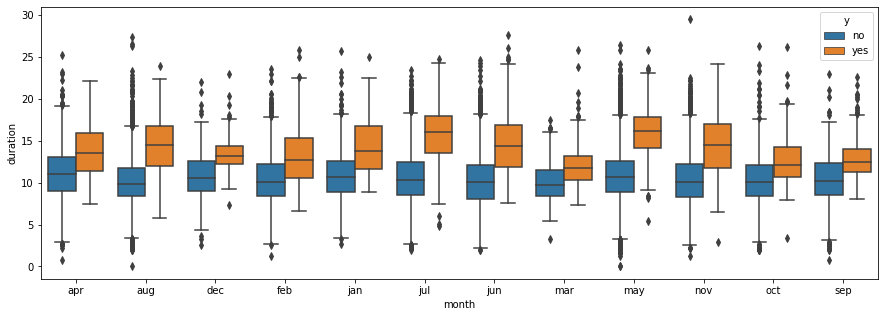

In [547]:
plt.figure(figsize=(15,5))
sns.boxplot(x='month',y=boxcox_transformation['duration'],hue='y',data=Bank_marketing)

Inference : From the above plot we can clearly see the distribution of data points .

#### Conclusion:

In this project I got an opputurnity deal with Bank marketing Dataset. The outcome variable is categorical variable "y".y contains the term deposit yes or no of the that particular campaign. The output variable is a categorical . Hence we will follow classification approach. The taks was to identify the variables that will be helpful in identifying the target variables.By doing EDA i came to find few important columns which will be helpful in predicting the target variable.In numericals ('balance','duration','campaign','pdays','previous') and in categorical socio -economic factors elements like ('job','marital','education','housing','loan','poutcome').All these will be helpful in identifying the target variables. 

In [114]:
Bank_marketing.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [48]:
Bank_marketing['campaign'].value_counts().to_frame().sort_index()

,campaign
1,17544
2,12505
3,5521
4,3522
5,1764
6,1291
7,735
8,540
9,327
10,266


In [120]:
Bank_marketing.skew()

C:\Users\dsv24\AppData\Local\Temp/ipykernel_12208/3371798739.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Bank_marketing.skew()


age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

<AxesSubplot:xlabel='y', ylabel='campaign'>

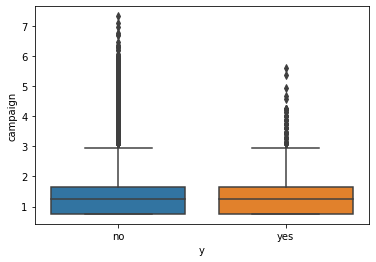

In [122]:
sns.boxplot(x='y',y=boxcox_transformation['campaign'],data=Bank_marketing)

In [123]:
boxcox_transformation['campaign'].describe()

count    45211.000000
mean         1.390324
std          0.756048
min          0.756828
25%          0.756828
50%          1.264296
75%          1.656854
max          7.313708
Name: campaign, dtype: float64

<AxesSubplot:xlabel='y', ylabel='campaign'>

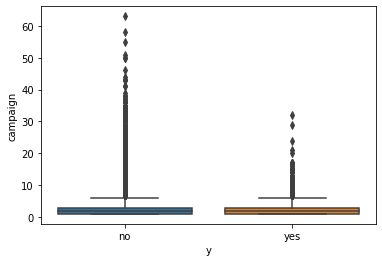

In [51]:
sns.boxplot(x='y',y='campaign',data=Bank_marketing)

In [63]:
Bank_marketing['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [62]:
Bank_marketing.groupby('y')['campaign'].min()

y
no     1
yes    1
Name: campaign, dtype: int64

In [88]:
Bank_marketing.shape

(45211, 17)

In [90]:
Bank_marketing.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [94]:
Bank_marketing.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [99]:
Bank_marketing['balance'].unique

<bound method Series.unique of 0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64>

In [64]:
boxcox_transformation.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,41495.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,6.119949,15.650330,10.953917,1.390324,-1.253960,0.275265
std,0.630458,9.162574,3.344798,0.756048,5.892631,0.680274
min,4.351191,-4.000000,0.000000,0.756828,-4.000000,0.000000
25%,5.658946,9.904270,8.773747,0.756828,-4.000000,0.000000
50%,6.059467,15.300111,10.671673,1.264296,-4.000000,0.000000
75%,6.583005,21.278434,12.917940,1.656854,-4.000000,0.000000
max,8.520677,67.506611,29.498796,7.313708,17.736475,12.303741


In [116]:
boxcox_transformation.skew()

age         0.249482
balance     0.341795
duration    0.394556
campaign    1.837935
pdays       1.738633
previous    3.058964
dtype: float64

In [83]:
boxcox_transformation.shape

(45211, 6)

In [87]:
boxcox_transformation.isnull().sum()

age            0
balance     3716
duration       0
campaign       0
pdays          0
previous       0
dtype: int64

In [81]:
boxcox_transformation1.describe()

,age,balance,duration,campaign,pdays,previous
count,40209.000000,36869.000000,40209.000000,40209.000000,40209.000000,40209.000000
mean,6.106955,15.151534,10.815055,1.336529,-1.966926,0.194178
std,0.611020,8.544318,3.019329,0.635135,5.068595,0.525670
min,4.351191,-4.000000,0.000000,0.756828,-4.000000,0.000000
25%,5.658946,9.734526,8.804343,0.756828,-4.000000,0.000000
50%,6.059467,15.101208,10.630974,1.264296,-4.000000,0.000000
75%,6.583005,20.876707,12.743436,1.656854,-4.000000,0.000000
max,7.692051,36.475455,18.665988,3.595316,13.188920,2.727171


In [84]:
boxcox_transformation1.shape

(40209, 6)

In [86]:
boxcox_transformation1.isnull().sum()

age            0
balance     3340
duration       0
campaign       0
pdays          0
previous       0
dtype: int64

In [112]:
Bank_marketing_zscore.describe()

,age,balance,day,duration,campaign,pdays,previous
count,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000
mean,40.659728,1083.466189,15.819792,235.794723,2.464324,25.184312,0.352632
std,10.086648,1722.823814,8.363663,190.408412,1.951391,71.762763,1.056890
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,66.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,430.000000,16.000000,178.000000,2.000000,-1.000000,0.000000
75%,48.000000,1345.000000,21.000000,306.000000,3.000000,-1.000000,0.000000
max,72.000000,10483.000000,31.000000,1030.000000,12.000000,340.000000,7.000000


In [102]:
Bank_marketing_zscore.shape

(40209, 17)

In [103]:
Bank_marketing_zscore

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [108]:
Bank_marketing_zscore.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [113]:
Bank_marketing_zscore.skew()

C:\Users\dsv24\AppData\Local\Temp/ipykernel_12208/3560449225.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Bank_marketing_zscore.skew()


age         0.437393
balance     2.443248
day         0.080460
duration    1.589047
campaign    2.069523
pdays       2.795853
previous    3.648407
dtype: float64

In [192]:
Bank_marketing['y'].value_counts(normalize=True)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

In [223]:
Bank_marketing[Bank_marketing['y']=='yes'].sort_index()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


<AxesSubplot:xlabel='default', ylabel='count'>

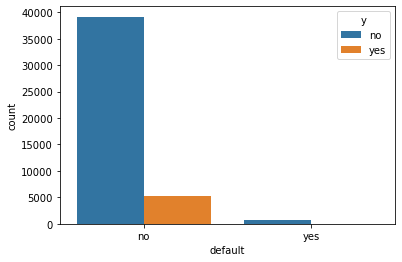

In [218]:
sns.countplot(x='default',hue='y',data=Bank_marketing)

<AxesSubplot:xlabel='default', ylabel='balance'>

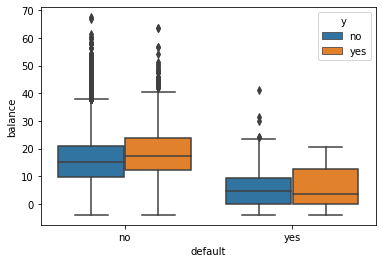

In [220]:
sns.boxplot(x='default',y=boxcox_transformation['balance'],hue='y',data=Bank_marketing)

In [227]:
Bank_marketing['balance'].value_counts()

 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

In [234]:
Bank_marketing['balance'].unique

<bound method Series.unique of 0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64>

In [237]:
boxcox_transformation['pdays'].value_counts(normalize=True)*100

-4.000000     81.736745
 10.712035     0.369379
 8.421691      0.325142
 8.388164      0.278693
 10.732093     0.278693
                ...    
 14.423117     0.002212
 14.453746     0.002212
 16.189296     0.002212
 15.763850     0.002212
 15.201432     0.002212
Name: pdays, Length: 559, dtype: float64

In [238]:
boxcox_transformation['previous'].value_counts(normalize=True)*100

0.000000     81.736745
0.756828      6.131251
1.264296      4.658158
1.656854      2.525934
1.981395      1.579262
2.260338      1.015240
2.506306      0.612683
2.727171      0.453429
2.928203      0.285329
3.113118      0.203490
3.284641      0.148194
3.444839      0.143770
3.595316      0.097321
3.737346      0.084050
4.000000      0.044237
3.871959      0.042025
4.239069      0.033178
4.122173      0.028754
4.458970      0.024330
4.562781      0.017695
4.853455      0.017695
4.351191      0.013271
4.759755      0.013271
4.944272      0.011059
5.201307      0.011059
4.662947      0.008847
5.361389      0.008847
5.032403      0.008847
5.438444      0.006636
5.995998      0.004424
5.931295      0.004424
5.118028      0.004424
5.282383      0.004424
6.741398      0.002212
12.303741     0.002212
7.085952      0.002212
5.587127      0.002212
6.121758      0.002212
6.942259      0.002212
5.797959      0.002212
6.182920      0.002212
Name: previous, dtype: float64

In [246]:
Bank_marketing[Bank_marketing['campaign']>5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
706,44,technician,single,unknown,no,78,yes,no,unknown,6,may,13,6,-1,0,unknown,no
758,59,services,married,secondary,no,307,yes,yes,unknown,6,may,250,7,-1,0,unknown,no
780,30,admin.,married,secondary,no,4,no,no,unknown,7,may,172,8,-1,0,unknown,no
797,39,management,married,tertiary,no,305,yes,no,unknown,7,may,275,6,-1,0,unknown,no
843,39,blue-collar,married,secondary,no,72,yes,no,unknown,7,may,425,6,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44770,37,services,single,tertiary,no,1189,no,no,cellular,13,sep,323,9,199,4,other,yes
44886,38,management,married,tertiary,no,0,no,no,cellular,24,sep,246,12,197,6,failure,no
44891,55,services,divorced,secondary,no,0,no,no,cellular,27,sep,262,6,193,4,success,yes
45015,53,admin.,married,secondary,no,459,no,no,cellular,14,oct,317,6,192,1,success,no
